<a href="https://colab.research.google.com/github/raviteja1432/AI/blob/main/mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/livercancer1.csv')
data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [ ]:
data.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [ ]:
data=data.drop(['Gender of the patient'],axis=1)

In [ ]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [ ]:
data = binary_encode(data, 'Result',2)

In [ ]:
data

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...
30686,50.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,0
30687,55.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,0
30688,54.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,0
30689,48.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,0


In [ ]:
data1=data

In [ ]:
y=data['Result']
data=data.drop(['Result'],axis=1)

In [ ]:
from sklearn import preprocessing
x=data.value_counts
scale=preprocessing.MinMaxScaler()
x_scaled=scale.fit_transform(data)
df=pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040
...,...,...,...,...,...,...,...,...,...
30686,0.534884,0.024129,0.045918,0.267220,0.003518,0.003659,0.666667,0.369565,0.100
30687,0.593023,0.033512,0.061224,0.204690,0.006030,0.004879,0.623188,0.326087,0.080
30688,0.581395,0.085791,0.147959,0.234001,0.053266,0.011384,0.536232,0.478261,0.240
30689,0.511628,0.020107,0.045918,0.082071,0.003015,0.009148,0.231884,0.152174,0.120


In [ ]:
df.fillna(df.mean(),inplace=True)
df

,0,1,2,3,4,5,6,7,8
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040
...,...,...,...,...,...,...,...,...,...
30686,0.534884,0.024129,0.045918,0.267220,0.003518,0.003659,0.666667,0.369565,0.100
30687,0.593023,0.033512,0.061224,0.204690,0.006030,0.004879,0.623188,0.326087,0.080
30688,0.581395,0.085791,0.147959,0.234001,0.053266,0.011384,0.536232,0.478261,0.240
30689,0.511628,0.020107,0.045918,0.082071,0.003015,0.009148,0.231884,0.152174,0.120


In [ ]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [ ]:
trainX,testX,trainY,testY=train_test_split(df,y,train_size=0.3,random_state=101)

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(trainX,trainY)

In [ ]:
y_pred = clf.predict(testX)
y_pred_tr=clf.predict(trainX)
print(y_pred)
print(y_pred_tr)

[0 1 0 ... 0 0 0]
[1 1 0 ... 0 0 1]


In [ ]:
import matplotlib.pyplot as plt
testa=[metrics.accuracy_score(testY, y_pred)]
traina=[clf.score(trainX, trainY)]
print("testing Accuracy:",metrics.accuracy_score(testY, y_pred))
print(" Training Accuracy",clf.score(trainX, trainY))


testing Accuracy: 0.9850586482964067
 Training Accuracy 1.0


In [ ]:
confusion_matrix(testY, y_pred)

array([[15136,   147],
       [  174,  6027]])

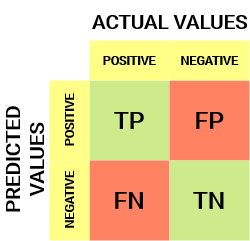

In [ ]:
confusion_matrix(trainY, y_pred_tr)

array([[6634,    0],
       [   0, 2573]])

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(trainX,trainY)

LogisticRegression()

In [ ]:
y_pred_train = lr_model.predict(trainX)
y_pred_test = lr_model.predict(testX)
print(" Training Accuracy",lr_model.score(trainX, trainY))
print(" Testing Accuracy",lr_model.score(testX, testY))

 Training Accuracy 0.7199956554795265
 Testing Accuracy 0.7109011357289146


In [ ]:
confusion_matrix(testY, y_pred_test)

array([[15117,   166],
       [ 6045,   156]])

In [ ]:
confusion_matrix(trainY, y_pred_train)

array([[6552,   82],
       [2496,   77]])

#Result-1 means not having disease
#Result-2 means having disease

In [ ]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))


In [ ]:
list_of_columns = data1.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['Result'], axis='columns', inplace=True)

input_data.at[0, 'Age of the patient'] = int(input('enter age of the patient'))
input_data.at[0, 'Total Bilirubin'] = float(input('enter value of total bilirubin in blood'))
input_data.at[0, 'Direct Bilirubin'] = float(input('enter value of direct bilirubin in blood'))
input_data.at[0, '\xa0Alkphos Alkaline Phosphotase'] = int(input('enter value of alkphos alkaline in blood'))
input_data.at[0, '\xa0Sgpt Alamine Aminotransferase'] = int(input('enter value of sgpt alamine in blood'))
input_data.at[0, 'Sgot Aspartate Aminotransferase'] = int(input('enter value of sgot asparatate in blood'))
input_data.at[0, 'Total Protiens'] = float(input('enter value of total protiens in blood'))
input_data.at[0, '\xa0ALB Albumin'] = float(input('enter alb albumin in blood'))
input_data.at[0, 'A/G Ratio Albumin and Globulin Ratio'] = float(input('enter value of a/g ratio albumin and globulin ratio'))
input_data['Age of the patient']=(input_data['Age of the patient']-data1['Age of the patient'].min())/(data1['Age of the patient'].max()-data1['Age of the patient'].min())
input_data['Total Bilirubin']=(input_data['Total Bilirubin']-data1['Total Bilirubin'].min())/(data1['Total Bilirubin'].max()-data1['Total Bilirubin'].min())
input_data['Direct Bilirubin']=(input_data['Direct Bilirubin']-data1['Direct Bilirubin'].min())/(data1['Direct Bilirubin'].max()-data1['Direct Bilirubin'].min())
input_data['\xa0Alkphos Alkaline Phosphotase']=(input_data['\xa0Alkphos Alkaline Phosphotase']-data1['\xa0Alkphos Alkaline Phosphotase'].min())/(data1['\xa0Alkphos Alkaline Phosphotase'].max()-data1['\xa0Alkphos Alkaline Phosphotase'].min())
input_data['\xa0Sgpt Alamine Aminotransferase']=(input_data['\xa0Sgpt Alamine Aminotransferase']-data1['\xa0Sgpt Alamine Aminotransferase'].min())/(data1['\xa0Sgpt Alamine Aminotransferase'].max()-data1['\xa0Sgpt Alamine Aminotransferase'].min())
input_data['Total Protiens']=(input_data['Total Protiens']-data1['Total Protiens'].min())/(data1['Total Protiens'].max()-data1['Total Protiens'].min())
input_data['\xa0ALB Albumin']=(input_data['\xa0ALB Albumin']-data1['\xa0ALB Albumin'].min())/(data1['\xa0ALB Albumin'].max()-data1['\xa0ALB Albumin'].min())
input_data['A/G Ratio Albumin and Globulin Ratio']=(input_data['A/G Ratio Albumin and Globulin Ratio']-data1['A/G Ratio Albumin and Globulin Ratio'].min())/(data1['A/G Ratio Albumin and Globulin Ratio'].max()-data1['A/G Ratio Albumin and Globulin Ratio'].min())
model = pickle.load(open('model.pkl', 'rb'))
prediction = model.predict(input_data)
result = prediction[0]
predict=result*(data1['Result'].max()-data1['Result'].min())+data1['Result'].min()
print('result',predict)
if predict==1:
  print('having  liver cancer disease')
else:
  print('not having liver cancer disease')

enter age of the patient8
enter value of total bilirubin in blood5.5
enter value of direct bilirubin in blood8.3
enter value of alkphos alkaline in blood8
enter value of sgpt alamine in blood9
enter value of sgot asparatate in blood400
enter value of total protiens in blood76.8
enter alb albumin in blood87.5
enter value of a/g ratio albumin and globulin ratio6.5
result 1
having  liver cancer disease


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

In [ ]:
data1.fillna(data1.mean(),inplace=True)

In [ ]:
data1.isna().sum()

Age of the patient                      0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
datanew=ms.fit_transform(data1)
print(datanew)

[[0.70930233 0.00402145 0.         ... 0.52173913 0.24       0.        ]
 [0.6744186  0.14075067 0.2755102  ... 0.5        0.176      0.        ]
 [0.6744186  0.0924933  0.20408163 ... 0.52173913 0.236      0.        ]
 ...
 [0.58139535 0.08579088 0.14795918 ... 0.47826087 0.24       0.        ]
 [0.51162791 0.02010724 0.04591837 ... 0.15217391 0.12       0.        ]
 [0.30232558 0.03619303 0.07653061 ... 0.65217391 0.4        0.        ]]


In [ ]:
dataset=pd.DataFrame(data=datanew[0:,0:]) 

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0
...,...,...,...,...,...,...,...,...,...,...
30686,0.534884,0.024129,0.045918,0.267220,0.003518,0.003659,0.666667,0.369565,0.100,0.0
30687,0.593023,0.033512,0.061224,0.204690,0.006030,0.004879,0.623188,0.326087,0.080,0.0
30688,0.581395,0.085791,0.147959,0.234001,0.053266,0.011384,0.536232,0.478261,0.240,0.0
30689,0.511628,0.020107,0.045918,0.082071,0.003015,0.009148,0.231884,0.152174,0.120,0.0


In [ ]:
X=dataset.iloc[:,0:9].values
Y=dataset.iloc[:,9:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(y_test)
print(X_train)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]
[[0.75581395 0.00402145 0.00510204 ... 0.4057971  0.30434783 0.164     ]
 [0.70930233 0.01742627 0.02040816 ... 0.43478261 0.47826087 0.32      ]
 [0.30232558 0.04691689 0.09693878 ... 0.66666667 0.32608696 0.04      ]
 ...
 [0.80232558 0.01608579 0.03571429 ... 0.46376812 0.43478261 0.264     ]
 [0.65116279 0.01474531 0.0255102  ... 0.26086957 0.23913043 0.2       ]
 [0.34883721 0.00670241 0.00510204 ... 0.60869565 0.60869565 0.32      ]]


In [ ]:
First_Layer_Size = 64# Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(9,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                640       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 120)               7800      
                                                                 
 dense_10 (Dense)            (None, 120)               14520     
                                                                 
 dense_11 (Dense)            (None, 120)               14520     
                                                                 
 dense_12 (Dense)            (None, 64)                7744      
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=1,epochs=500,verbose=1)

Epoch 1/500
21483/21483 [==============================] - 38s 2ms/step - loss: 0.6063 - accuracy: 0.7142
Epoch 2/500
21483/21483 [==============================] - 37s 2ms/step - loss: 0.5872 - accuracy: 0.7142
Epoch 3/500
21483/21483 [==============================] - 38s 2ms/step - loss: 0.5774 - accuracy: 0.7142
Epoch 4/500
21483/21483 [==============================] - 38s 2ms/step - loss: 0.5655 - accuracy: 0.7142
Epoch 5/500
21483/21483 [==============================] - 40s 2ms/step - loss: 0.5526 - accuracy: 0.7142
Epoch 6/500
21483/21483 [==============================] - 37s 2ms/step - loss: 0.5409 - accuracy: 0.7142
Epoch 7/500
21483/21483 [==============================] - 37s 2ms/step - loss: 0.5319 - accuracy: 0.7142
Epoch 8/500
21483/21483 [==============================] - 37s 2ms/step - loss: 0.5253 - accuracy: 0.7142
Epoch 9/500
21483/21483 [==============================] - 37s 2ms/step - loss: 0.5209 - accuracy: 0.7142
Epoch 10/500
21483/21483 [====================

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

288/288 [==============================] - 1s 2ms/step - loss: 0.4887 - accuracy: 0.7384
Test loss: 0.4886535704135895
Test accuracy: 0.7383796572685242


In [ ]:
print(X_test[0])
prediction = model.predict(X_test[0].reshape(1,9))
print("Prediction class:",np.round(prediction[0]))
print("Actual class:",y_test[0])

[0.43023256 0.0080429  0.00510204 0.06155349 0.02110553 0.00426916
 0.76811594 0.84782609 0.48      ]
Prediction class: [1.]
Actual class: [0.]


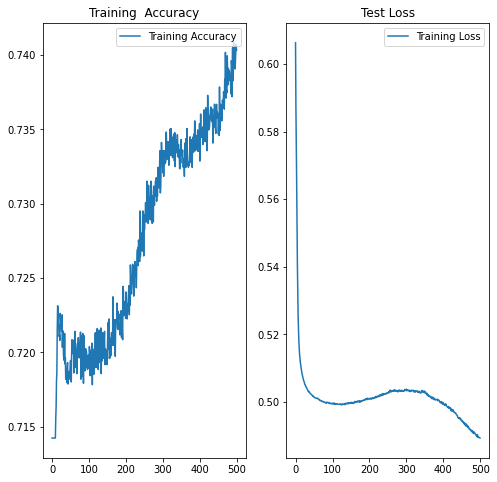

In [ ]:
acc = history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot( acc, label='Training Accuracy')
plt.legend(loc='upper right')
plt.title('Training  Accuracy')

plt.subplot(1, 2, 2)
plt.plot( loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Test Loss')
plt.show()

In [ ]:
prediction=model.predict(X_test)
pred = []
for i in prediction:
  if(i < 0.299):
    pred.append([0])
  else:
    pred.append([1])
confusion_matrix(y_test,pred)

array([[3891, 2682],
       [ 418, 2217]])

In [ ]:
model.save("Binary_Model.h5")

In [ ]:
list_of_columns = data1.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['Result'], axis='columns', inplace=True)

input_data.at[0, 'Age of the patient'] = int(input('enter age of the patient'))
input_data.at[0, 'Total Bilirubin'] = float(input('enter value of total bilirubin in blood'))
input_data.at[0, 'Direct Bilirubin'] = float(input('enter value of direct bilirubin in blood'))
input_data.at[0, '\xa0Alkphos Alkaline Phosphotase'] = int(input('enter value of alkphos alkaline in blood'))
input_data.at[0, '\xa0Sgpt Alamine Aminotransferase'] = int(input('enter value of sgpt alamine in blood'))
input_data.at[0, 'Sgot Aspartate Aminotransferase'] = int(input('enter value of sgot asparatate in blood'))
input_data.at[0, 'Total Protiens'] = float(input('enter value of total protiens in blood'))
input_data.at[0, '\xa0ALB Albumin'] = float(input('enter alb albumin in blood'))
input_data.at[0, 'A/G Ratio Albumin and Globulin Ratio'] = float(input('enter value of a/g ratio albumin and globulin ratio'))
input_data['Age of the patient']=(input_data['Age of the patient']-data1['Age of the patient'].min())/(data1['Age of the patient'].max()-data1['Age of the patient'].min())
input_data['Total Bilirubin']=(input_data['Total Bilirubin']-data1['Total Bilirubin'].min())/(data1['Total Bilirubin'].max()-data1['Total Bilirubin'].min())
input_data['Direct Bilirubin']=(input_data['Direct Bilirubin']-data1['Direct Bilirubin'].min())/(data1['Direct Bilirubin'].max()-data1['Direct Bilirubin'].min())
input_data['\xa0Alkphos Alkaline Phosphotase']=(input_data['\xa0Alkphos Alkaline Phosphotase']-data1['\xa0Alkphos Alkaline Phosphotase'].min())/(data1['\xa0Alkphos Alkaline Phosphotase'].max()-data1['\xa0Alkphos Alkaline Phosphotase'].min())
input_data['\xa0Sgpt Alamine Aminotransferase']=(input_data['\xa0Sgpt Alamine Aminotransferase']-data1['\xa0Sgpt Alamine Aminotransferase'].min())/(data1['\xa0Sgpt Alamine Aminotransferase'].max()-data1['\xa0Sgpt Alamine Aminotransferase'].min())
input_data['Total Protiens']=(input_data['Total Protiens']-data1['Total Protiens'].min())/(data1['Total Protiens'].max()-data1['Total Protiens'].min())
input_data['\xa0ALB Albumin']=(input_data['\xa0ALB Albumin']-data1['\xa0ALB Albumin'].min())/(data1['\xa0ALB Albumin'].max()-data1['\xa0ALB Albumin'].min())
input_data['A/G Ratio Albumin and Globulin Ratio']=(input_data['A/G Ratio Albumin and Globulin Ratio']-data1['A/G Ratio Albumin and Globulin Ratio'].min())/(data1['A/G Ratio Albumin and Globulin Ratio'].max()-data1['A/G Ratio Albumin and Globulin Ratio'].min())
#n = np.asarray(input_data).astype(np.float32)
from keras.models import load_model
model = load_model('Binary_Model.h5')
n = np.asarray(input_data).astype(np.float32)
prediction = model.predict(n[0].reshape(1,9))
result = prediction[0]
#predict=result*(data1['Result'].max()-data1['Result'].min())+data1['Result'].min()
predict1=np.round(result)
print('result',predict1)
if predict1==1:
  print('having  liver cancer disease')
else:
  print('not having liver cancer disease')
